<a href="https://colab.research.google.com/github/HaniaArif/Data-Science-From-Scratch/blob/main/Chapter1/Finding_Key_Connectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dump of the entire DataSciencester network
list of users, each represented by a dict that contains for each user his or her id and name.

In [ ]:
users = [{ "id": 0, "name": "Hero" },    
         { "id": 1, "name": "Dunn" },    
         { "id": 2, "name": "Sue" },    
         { "id": 3, "name": "Chi" },    
         { "id": 4, "name": "Thor" },    
         { "id": 5, "name": "Clive" },    
         { "id": 6, "name": "Hicks" },    
         { "id": 7, "name": "Devin" },    
         { "id": 8, "name": "Kate" },    
         { "id": 9, "name": "Klein" }]

###“Friendship” data
 list of pairs of IDs

In [ ]:
friendships=[(0,1),(0,2),(1,2),(1,3),(2,3),(3,4),
             (4,5),(5,6),(5,7),(6,8),(7,8),(8,9)]



---


#Plotting Graph with nodes and edges
plotted the friendships graph

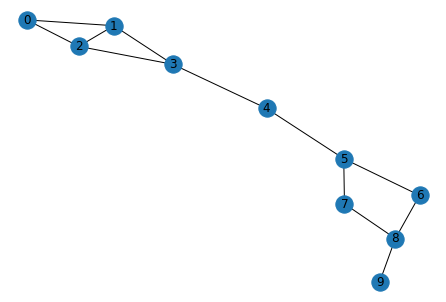

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
fNetwork = nx.Graph()
for i,j in friendships:
  fNetwork.add_edge(i,j)
  #fNetwork.add_edge(users[i]["name"],users[j]["name"])     #if you want to check via names in the graph
  
nx.draw(fNetwork, with_labels=True)



---



#Adding friends list to user data
add a key "friends" and an empty list as it value in the "user" data so that you can store the friends names in that empty list

In [ ]:
for user in users:
  user["friends"]=[]

add friends' names to the user using friendship data. 
first value from the friendship ordered pair acts as the user id and the second user id is that of the friend.

In [ ]:
for i, j in friendships:
  #users[i]["friends"].append(users[j])   #use if you want to add all data of friends
  #users[j]["friends"].append(users[i])
  users[i]["friends"].append(users[j]["name"])    #use if you want to add friends names only
  users[j]["friends"].append(users[i]["name"]) #because the friends pairs are given only once saying if a is a friend of b then b is a friend of a.

print(users)

[{'id': 0, 'name': 'Hero', 'friends': ['Dunn', 'Sue']}, {'id': 1, 'name': 'Dunn', 'friends': ['Hero', 'Sue', 'Chi']}, {'id': 2, 'name': 'Sue', 'friends': ['Hero', 'Dunn', 'Chi']}, {'id': 3, 'name': 'Chi', 'friends': ['Dunn', 'Sue', 'Thor']}, {'id': 4, 'name': 'Thor', 'friends': ['Chi', 'Clive']}, {'id': 5, 'name': 'Clive', 'friends': ['Thor', 'Hicks', 'Devin']}, {'id': 6, 'name': 'Hicks', 'friends': ['Clive', 'Kate']}, {'id': 7, 'name': 'Devin', 'friends': ['Clive', 'Kate']}, {'id': 8, 'name': 'Kate', 'friends': ['Hicks', 'Devin', 'Klein']}, {'id': 9, 'name': 'Klein', 'friends': ['Kate']}]


#How many friends does each user have?

In [ ]:
def total_friends(users):
  for user in users:
    print(user["name"], "has", len(user["friends"]) ,"friends = ", user["friends"], "\n")

total_friends(users)


Hero has 2 friends =  ['Dunn', 'Sue'] 

Dunn has 3 friends =  ['Hero', 'Sue', 'Chi'] 

Sue has 3 friends =  ['Hero', 'Dunn', 'Chi'] 

Chi has 3 friends =  ['Dunn', 'Sue', 'Thor'] 

Thor has 2 friends =  ['Chi', 'Clive'] 

Clive has 3 friends =  ['Thor', 'Hicks', 'Devin'] 

Hicks has 2 friends =  ['Clive', 'Kate'] 

Devin has 2 friends =  ['Clive', 'Kate'] 

Kate has 3 friends =  ['Hicks', 'Devin', 'Klein'] 

Klein has 1 friends =  ['Kate'] 



#Average number of connections?

In [ ]:
def avg_friends(users):
  sum = 0
  for user in users:
    sum = sum + len(user["friends"])
  print(sum/len(users))
avg_friends(users)


2.4




---
#How to use short 'for loop' syntax


In [ ]:
def friends_count(user):
  return len(user["friends"])

def avg_friends_count(users):
  total_friends = sum(friends_count(user) for user in users)     #if there is a single line statement in for loop 
                                                                 # then we can write that one statement before the loop - making it sort
  print(total_friends/len(users))
    
avg_friends_count(users)


2.4




---
#How to use lambda function?
lambda function is used to **calculate mathematical expressions**.
It can't have loop inside it. You have to write expression inside it so it can calculate it. *(**NOTE:** Do not write statements inside lambda function, or it won't work!)*




In [33]:
avg_friends = lambda x, y: "Meow Meow" if x=="Cats" else "Quack Quack"    #don't write def in the start as lambda function defines it
                                                                          #write the names of parameters of the function in front of the word 'lambda'
avg_friends("Dog", "Duck")

'Quack Quack'



---



#Find most connected people?